In [2]:
import matplotlib.pyplot as plt
import pickle as pkl

In [3]:
def stats(suspect_intervals, start_time, end_time, error_history, computation_time):
    total_suspect_t=0
    tmr=0.0
    for (k, interval) in enumerate(suspect_intervals):
        total_suspect_t+=interval[1]-interval[0]
        if (k+1==len(suspect_intervals)): continue;
        tmr += suspect_intervals[k+1][0]-suspect_intervals[k][1]
    tmr/=len(suspect_intervals)-1
    #print(total_suspect_t)
    #print(end_time-start_time)
    pa = 1-total_suspect_t/(end_time-start_time)
    print("Pa is %f percent"%(pa*100,))
    print("Average Tmr is %f"%(tmr/1e9))
    #print(start_time, end_time)
    tm=0.0
    t_over=0.0
    tot_mistake=0;
    tot_correct=0;
    for (k, e) in enumerate(error_history):
        if (k==0):continue
        if (e<=0):
            tot_correct+=1;
            t_over+=-e;
        else:
            tot_mistake+=1;
            tm+=e;
    tot_time=0.0;
    tot_count=0;
    for (k, e) in enumerate(computation_time):
        tot_count+=1
        tot_time+=e
    print("Average Tm is %f"%(tm/tot_mistake))
    print("Average over-estimation is %f"%(t_over/tot_correct))
    print("Average computation time per receive is %f"%(tot_time/tot_count))

In [6]:
def parse_file(trace_list, model_name):
    file_name = model_name + "_suspect%d_%d.pkl"
    path = "../output_data/"
    num_traces=len(trace_list)
    for i in range(num_traces):
        u = trace_list[i][0]; v = trace_list[i][1];
        cur_file = path+file_name%(u,v)
        print(cur_file)
        f=open(cur_file, "rb")
        suspect_intervals=pkl.load(f);
        start_time=pkl.load(f);
        end_time=pkl.load(f);
        error_history=pkl.load(f);
        computation_time=pkl.load(f);
        f.close()
        plt.plot(error_history[1:])
        plt.ylim(-0.1, 0.1);
        plt.show()
        stats(suspect_intervals,start_time,end_time,error_history,computation_time)

../output_data/CoRNN_suspect1_0.pkl


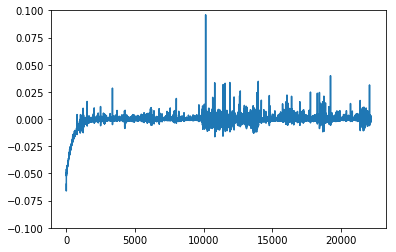

Pa is 99.806091 percent
Average Tmr is 0.539454
Average Tm is 0.002106
Average over-estimation is 0.002719
Average computation time per receive is 0.002434
../output_data/CoRNN_suspect3_0.pkl


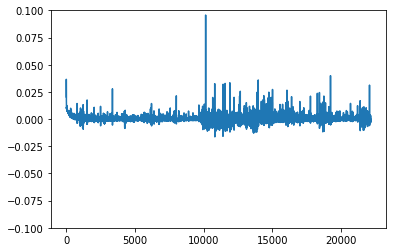

Pa is 99.387970 percent
Average Tmr is 0.454826
Average Tm is 0.002529
Average over-estimation is 0.001597
Average computation time per receive is 0.002283
../output_data/CoRNN_suspect4_0.pkl


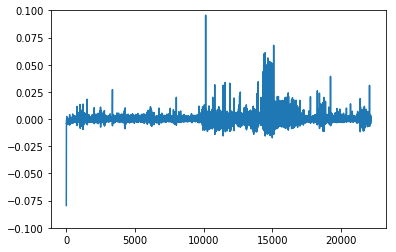

Pa is 99.466743 percent
Average Tmr is 0.452509
Average Tm is 0.002762
Average over-estimation is 0.002401
Average computation time per receive is 0.002256


In [7]:
trace_list = [(1,0), (3,0), (4,0)]
parse_file(trace_list, "CoRNN")

../output_data/RNN_suspect1_0.pkl


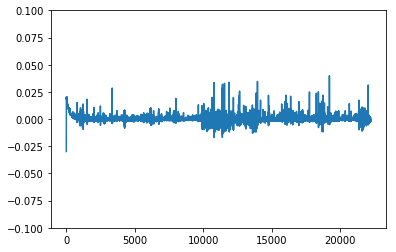

Pa is 99.806885 percent
Average Tmr is 0.447086
Average Tm is 0.002634
Average over-estimation is 0.001487
Average computation time per receive is 0.001464
../output_data/RNN_suspect3_0.pkl


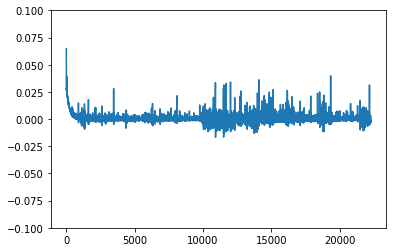

Pa is 99.384872 percent
Average Tmr is 0.445724
Average Tm is 0.003245
Average over-estimation is 0.001611
Average computation time per receive is 0.001463
../output_data/RNN_suspect4_0.pkl


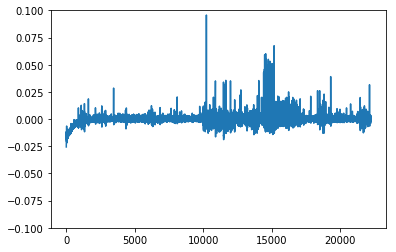

Pa is 99.469162 percent
Average Tmr is 0.453791
Average Tm is 0.002924
Average over-estimation is 0.002873
Average computation time per receive is 0.001475


In [10]:
parse_file(trace_list, "RNN")

../output_data/Bertier_suspect1_0.pkl


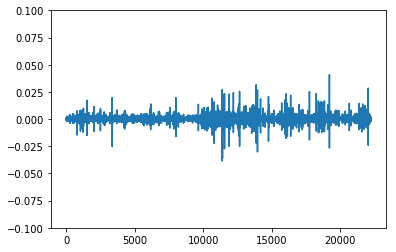

Pa is 99.402991 percent
Average Tmr is 0.210075
Average Tm is 0.001262
Average over-estimation is 0.001133
Average computation time per receive is 0.000003
../output_data/Bertier_suspect3_0.pkl


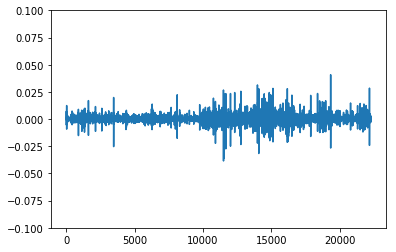

Pa is 99.344420 percent
Average Tmr is 0.211834
Average Tm is 0.001398
Average over-estimation is 0.001235
Average computation time per receive is 0.000003
../output_data/Bertier_suspect4_0.pkl


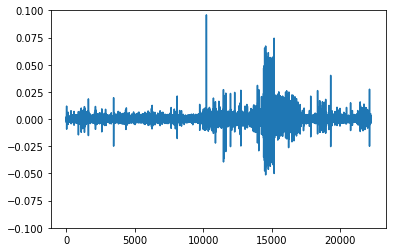

Pa is 99.032771 percent
Average Tmr is 0.211478
Average Tm is 0.002074
Average over-estimation is 0.001819
Average computation time per receive is 0.000003


In [9]:
parse_file(trace_list, "Bertier")